In [1]:
!git clone https://github.com/Pierre-mulliez1/WineMe.git

Cloning into 'WineMe'...
remote: Enumerating objects: 36, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 36 (delta 12), reused 27 (delta 7), pack-reused 0
Unpacking objects: 100% (36/36), done.
Checking out files: 100% (16/16), done.


In [12]:
#import packages 
import sklearn
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
df = pd.read_csv('/content/WineMe/data/winemag-data-130k-v2.csv')

In [7]:
df

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


In [ ]:
df.variety.unique()

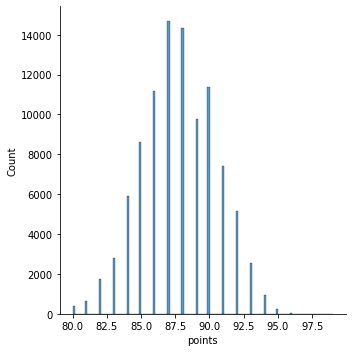

In [19]:
sns.displot(df, x="points")

In [40]:
df = df[df['price']< 100]

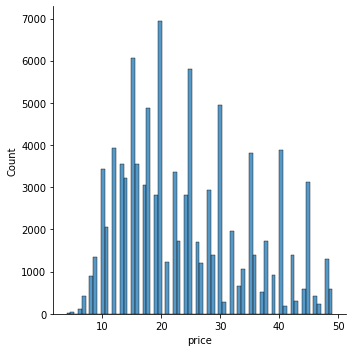

In [18]:
sns.displot(df, x="price")

In [42]:
import re
#df['red_white_cava'] = df['variety'].str.findall('red|white|cava', flags=re.IGNORECASE)
#df['red_white_cava'] = df['red_white_cava'].str.get(0)
df['red_white_cava'] = df['description'].str.findall('red|white|cava', flags=re.IGNORECASE)
df['red_white_cava'] = df['red_white_cava'].str.get(0)
df

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,red_white_cava
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,red
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,NaN
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,NaN
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,NaN
5,5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),NaN
129967,129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation,red
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser,NaN
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss,NaN


In [33]:
type(df['red_white_cava_v2'].head(1))

pandas.core.series.Series

In [45]:
df['new_price'] = pd.qcut(df['price'],
                            q=[0, .25, .5, .75, 1],
                            labels=False,
                            precision=0)
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,red_white_cava,new_price
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,red,0
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,NaN,0
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,NaN,0
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,NaN,3
5,5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,NaN,0


In [61]:
df['new_price'].value_counts()

0    31702
1    29574
2    28399
3    27349
Name: new_price, dtype: int64

In [46]:
df['new_rating'] = pd.qcut(df['points'],
                            q=[0, .25, .5, .75, 1],
                            labels=False,
                            precision=0)
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,red_white_cava,new_price,new_rating
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,red,0,1
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,NaN,0,1
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,NaN,0,1
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,NaN,3,1
5,5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,NaN,0,1


In [ ]:
df = df.rename(columns={'Unnamed: 0': "wine_id"})
df = df[['wine_id', 'points', 'price', 'red_white_cava', 'new_price', 'new_rating']]

In [55]:
df

,wine_id,points,price,red_white_cava,new_price,new_rating
1,1,87,15.0,red,0,1
2,2,87,14.0,NaN,0,1
3,3,87,13.0,NaN,0,1
4,4,87,65.0,NaN,3,1
5,5,87,15.0,NaN,0,1
...,...,...,...,...,...,...
129966,129966,90,28.0,NaN,2,2
129967,129967,90,75.0,red,3,2
129968,129968,90,30.0,NaN,2,2
129969,129969,90,32.0,NaN,2,2


In [56]:
df.red_white_cava.value_counts()

red      30896
white     9032
Red        928
White      269
Cava       122
cava        28
Name: red_white_cava, dtype: int64

In [58]:
pd.get_dummies(df.new_price, prefix='price')

,price_0,price_1,price_2,price_3
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,0,0,0,1
5,1,0,0,0
...,...,...,...,...
129966,0,0,1,0
129967,0,0,0,1
129968,0,0,1,0
129969,0,0,1,0


In [62]:
# Get one hot encoding of columns B
one_hot_price = pd.get_dummies(df['new_price'], prefix = 'price')
one_hot_rating = pd.get_dummies(df['new_rating'], prefix = 'rating')
# Drop column B as it is now encoded
df = df.drop('new_price',axis = 1)
df = df.drop('new_rating',axis = 1)
# Join the encoded df
df = df.join(one_hot_price)
df = df.join(one_hot_rating)
df

,wine_id,points,price,red_white_cava,price_0,price_1,price_2,price_3,rating_0,rating_1,rating_2,rating_3
1,1,87,15.0,red,1,0,0,0,0,1,0,0
2,2,87,14.0,NaN,1,0,0,0,0,1,0,0
3,3,87,13.0,NaN,1,0,0,0,0,1,0,0
4,4,87,65.0,NaN,0,0,0,1,0,1,0,0
5,5,87,15.0,NaN,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,90,28.0,NaN,0,0,1,0,0,0,1,0
129967,129967,90,75.0,red,0,0,0,1,0,0,1,0
129968,129968,90,30.0,NaN,0,0,1,0,0,0,1,0
129969,129969,90,32.0,NaN,0,0,1,0,0,0,1,0
